# LINEAR REGRESSION

In [0]:
import sys
sys.path.append('/usr/lib/python2.7/dist-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df=pd.read_excel('Train1.xlsx')

In [0]:
df.drop('Country Name',axis=1,inplace=True)

In [0]:
df.drop('Year',axis=1,inplace=True)


In [0]:
x_train = df.drop('Happiness Score',axis=1)

In [0]:
y_train = df['Happiness Score']

**TRAINING THE DATASET**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [0]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
df1=pd.read_excel('Test1.xlsx')

In [0]:
df1.drop('Country Name',axis=1,inplace=True)

In [0]:
df1.drop('Year',axis=1,inplace=True)

In [0]:
y_test=df1['Happiness Score']

In [0]:
x_test=df1.drop('Happiness Score',axis=1)

In [0]:
y_test.head()

0    3.794
1    4.644
2    5.872
3    3.795
4    6.599
Name: Happiness Score, dtype: float64

** PREDICTION**

In [0]:
predictions=lm.predict(x_test)

In [0]:
predictions

array([4.08011354, 5.20000975, 5.54214886, 4.01657371, 6.07486068,
       5.0150631 , 7.66379071, 6.77549477, 5.4618085 , 5.99580606,
       5.03499305, 5.18595404, 6.54383456, 5.63824286, 3.97080172,
       5.43652826, 5.69615213, 4.96958288, 4.87587122, 6.81530602,
       5.32766153, 3.80395268, 2.92201603, 3.9935343 , 4.24679676,
       7.63421409, 2.9246231 , 3.83132828, 6.45498173, 5.56420296,
       5.86373149, 4.14502423, 6.32431866, 5.48378712, 6.29504035,
       6.45325667, 6.92227529, 4.53060776, 5.37934758, 6.47373797,
       4.92567681, 5.81863353, 6.32205768, 4.4101671 , 6.9065744 ,
       6.51565729, 4.78581321, 4.64449021, 6.36995267, 4.47615508,
       5.53008286, 5.34311876, 4.0866756 , 4.50851521, 5.86217836,
       6.01653808, 7.33247304, 4.11113828, 5.29295938, 5.60731095,
       4.85082555, 6.45497942, 6.56214328, 6.41292734, 5.44348838,
       6.65053167, 5.21041111, 5.15322418, 4.42509616, 5.12042306,
       6.27807516, 5.28200595, 5.98431746, 4.34146168, 4.30355

**COMPARISON USING JOINTPLOT**

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/kirants/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


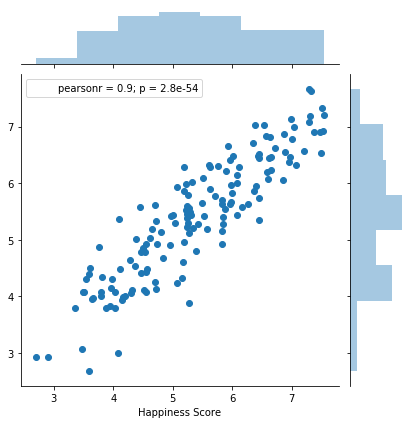

In [0]:
sns.jointplot(y_test,predictions)

**MODEL EVALUATION**

In [0]:
from sklearn import metrics

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.41186497391999877
MSE: 0.25496692213523725
RMSE: 0.5049424938893906


**BEST FEATURE TO PREDICT HAPPINESS SCORE**

In [0]:
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, 1)
rfe = rfe.fit(x_train,y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
x_train.columns

[False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[14 22  1  2  4 18  7  3  5 13 16 19 20 26 15 21 17  8  9 25 11 10 24 12
 23  6]


Index(['EG.ELC.ACCS.ZS', 'SE.PRM.TENR', 'NY.ADJ.NNTY.KD.ZG',
       'NY.ADJ.NNTY.PC.KD.ZG', 'NY.ADJ.AEDU.GN.ZS', 'NY.ADJ.ICTR.GN.ZS',
       'SP.POP.DPND', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN', 'SE.XPD.PRIM.ZS',
       'SE.XPD.SECO.ZS', 'GC.XPN.TOTL.GD.ZS', 'SH.XPD.EHEX.CH.ZS',
       'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG', 'NY.GDS.TOTL.ZS',
       'NV.IND.MANF.KD.ZG', 'SH.DYN.NMRT', 'SH.DYN.MORT', 'SP.POP.TOTL',
       'SE.SEC.ENRL.TC.ZS', 'SE.PRM.ENRL.TC.ZS', 'AG.SRF.TOTL.K2',
       'GC.TAX.TOTL.GD.ZS', 'NE.TRD.GNFS.ZS', 'SL.UEM.TOTL.NE.ZS'],
      dtype='object')

**Best Feature is**

In [0]:
print (x_train.columns[3])

NY.ADJ.NNTY.PC.KD.ZG
